In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from ctapipe.calib.camera import DragonPedestal
from ctapipe.calib.camera.dragon import remove_pedestal

In [4]:
path_to_data = os.path.join("/home", "pawel1", "Pulpit", "Astrophysics", "CTA", "dragon",
                            "data", "dane_lst", "20180705", "Date20180705.0000.fits.fz")
reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)

ped = DragonPedestal()
for i in range(0, 5000):
    ev = seeker[i]
    ped.fill_pedestal_event(ev, 1)

ped.finalize_pedestal()

/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


/home/pawel1/anaconda3/envs/cta-dev/lib/python3.6/site-packages/protozfits/__init__.py:56: UserWarning:         Multiple open zfits files at the same time are not supported.
        Reading from mutliple open tables at the same time will reset these
        tables continously and you will read always the same events.
        
  ''')


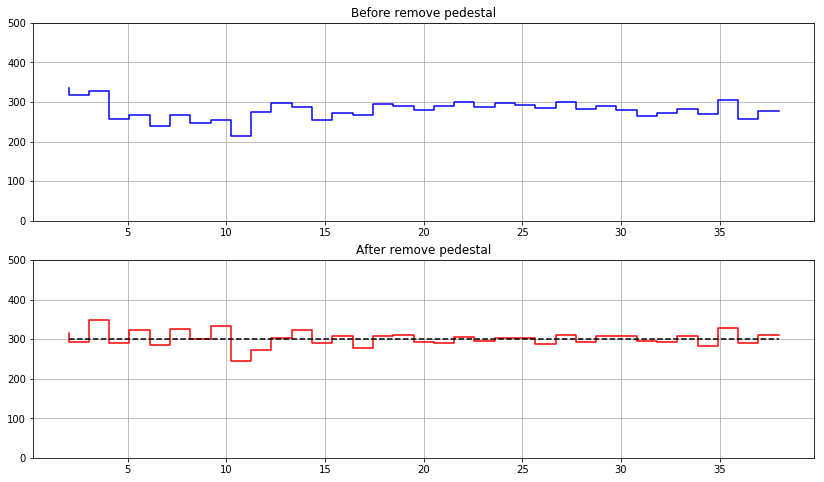

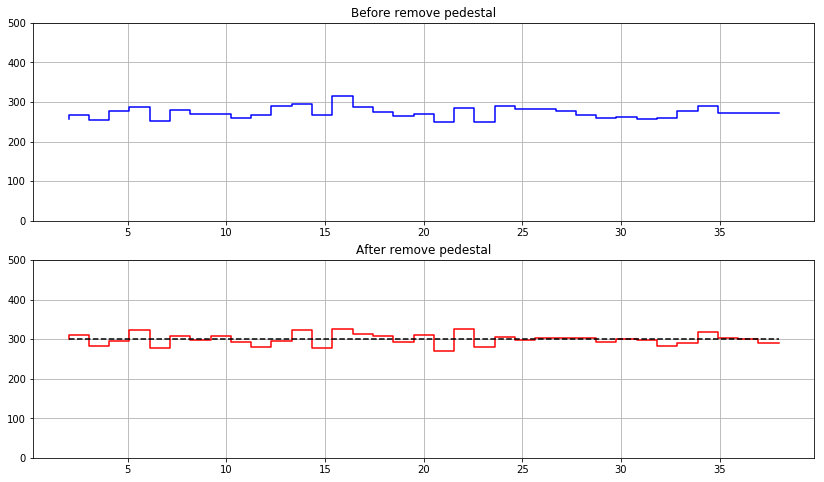

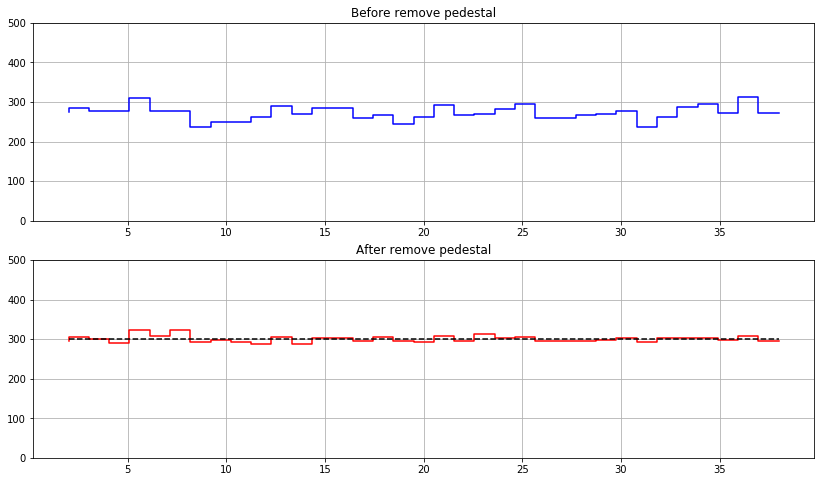

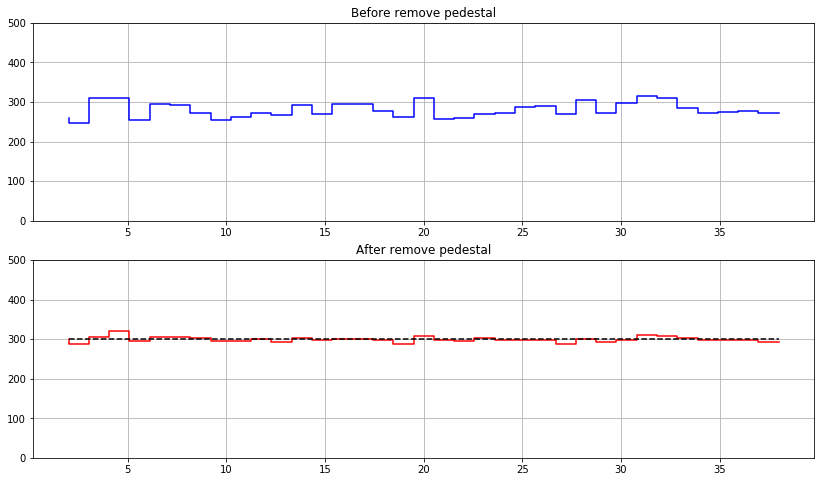

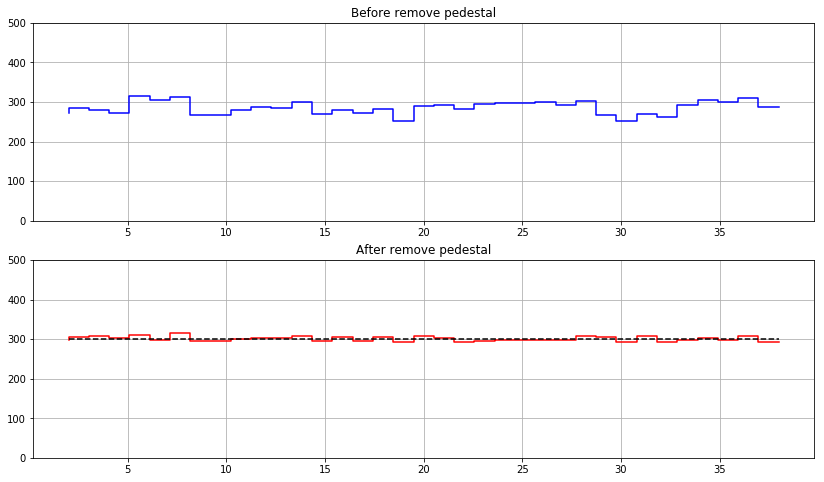

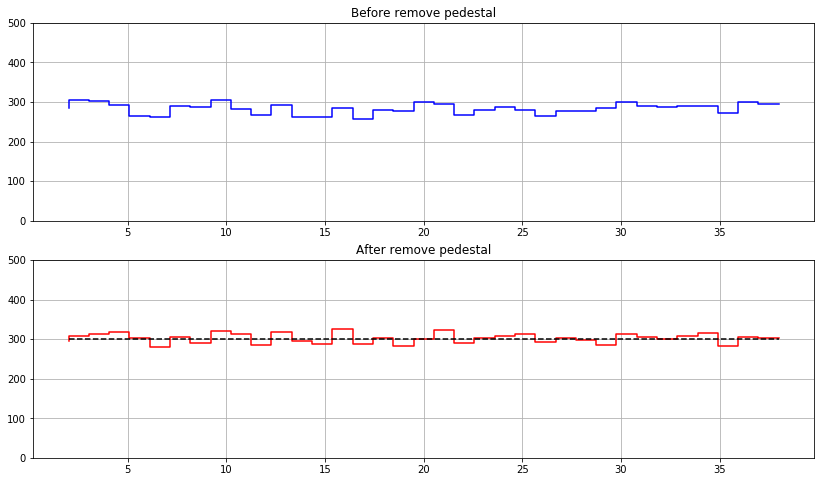

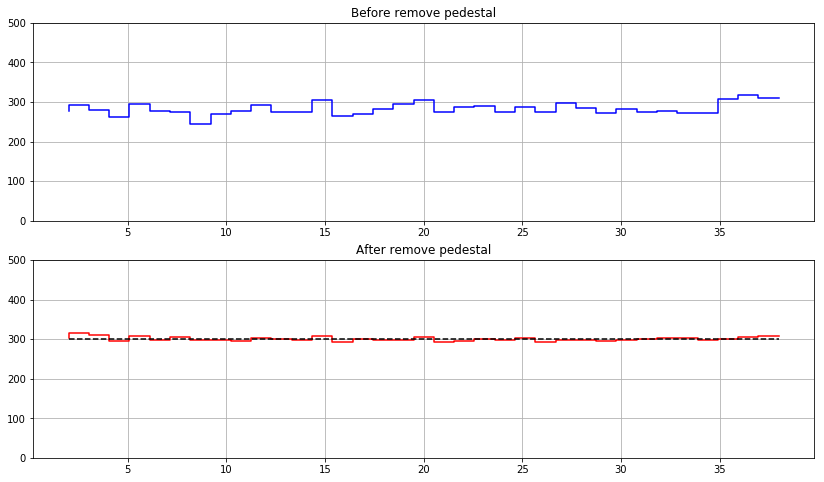

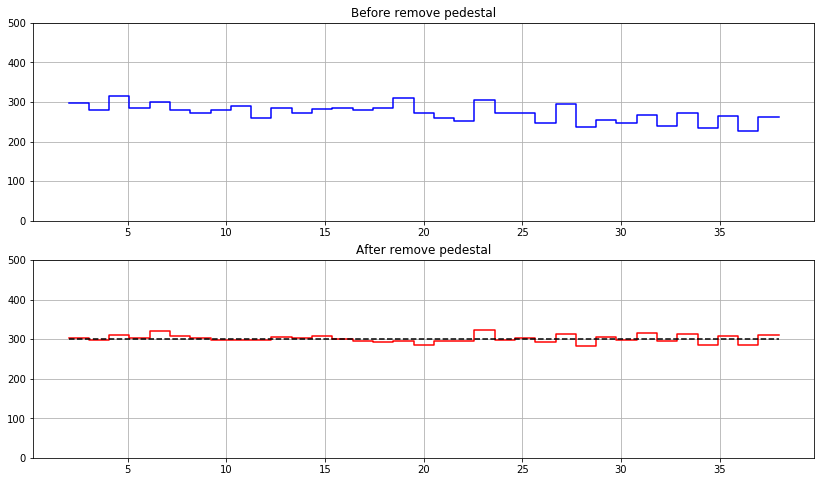

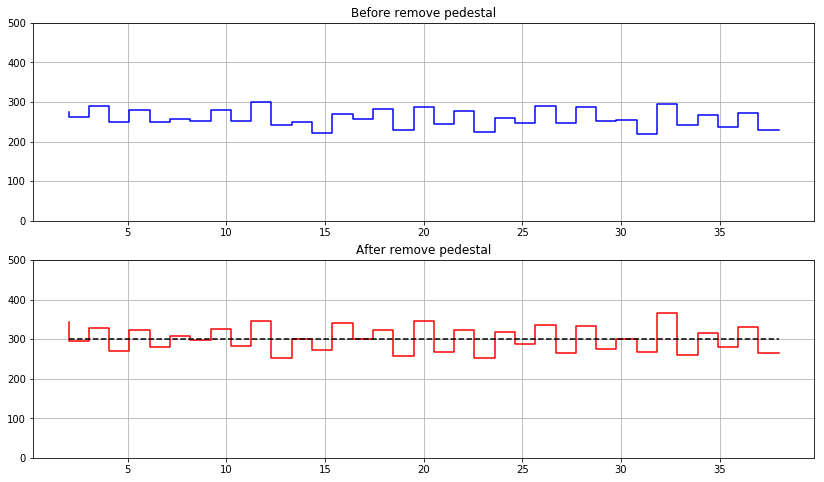

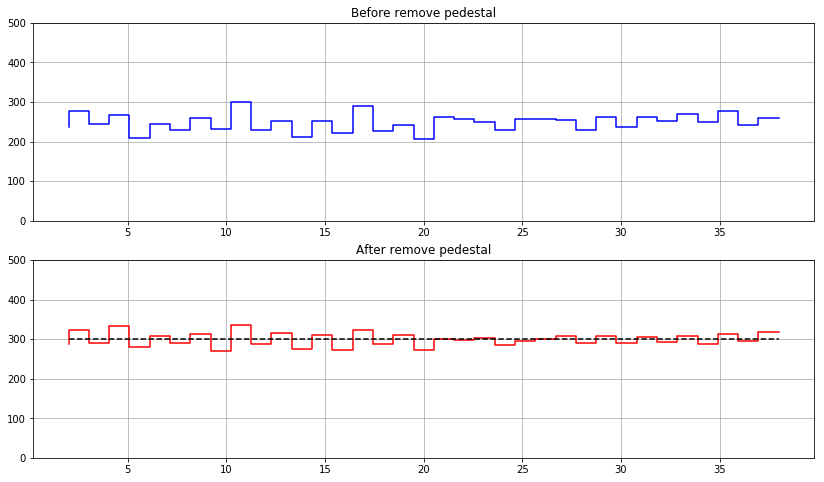

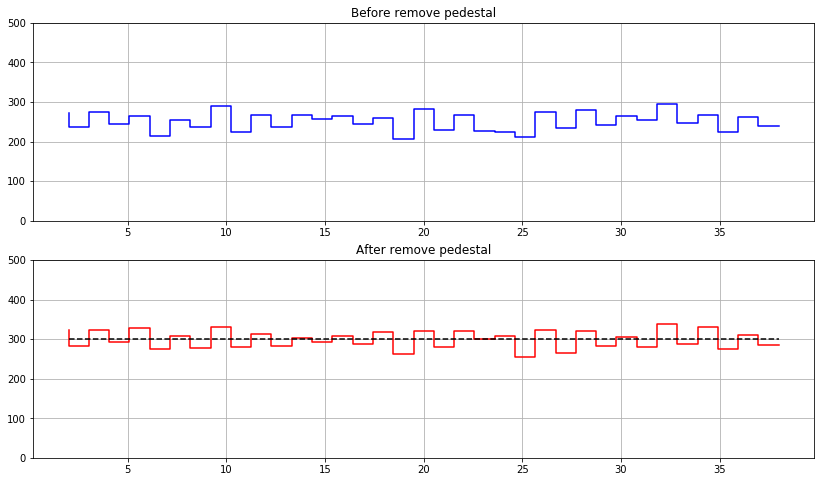

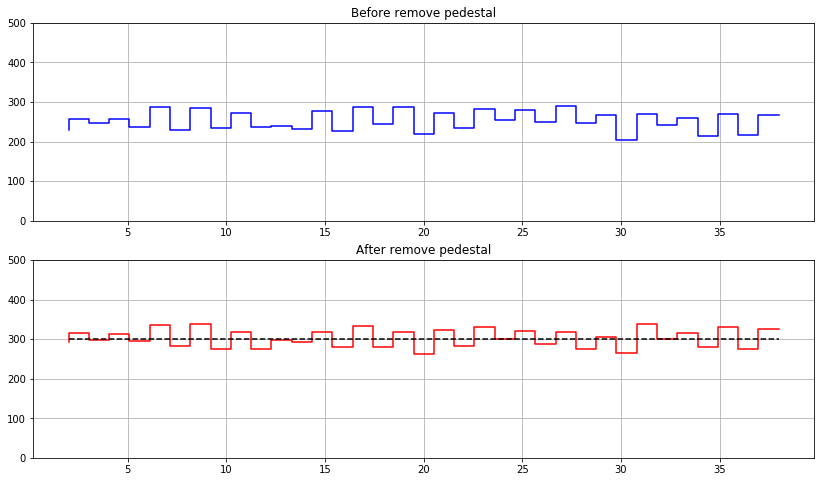

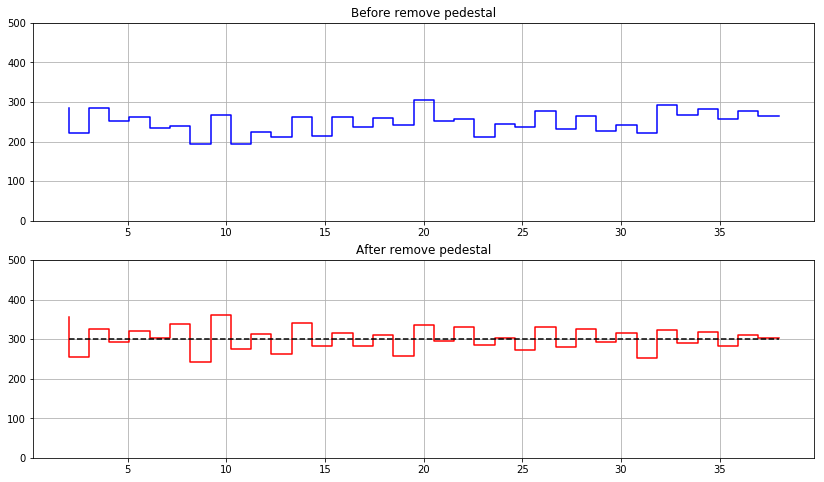

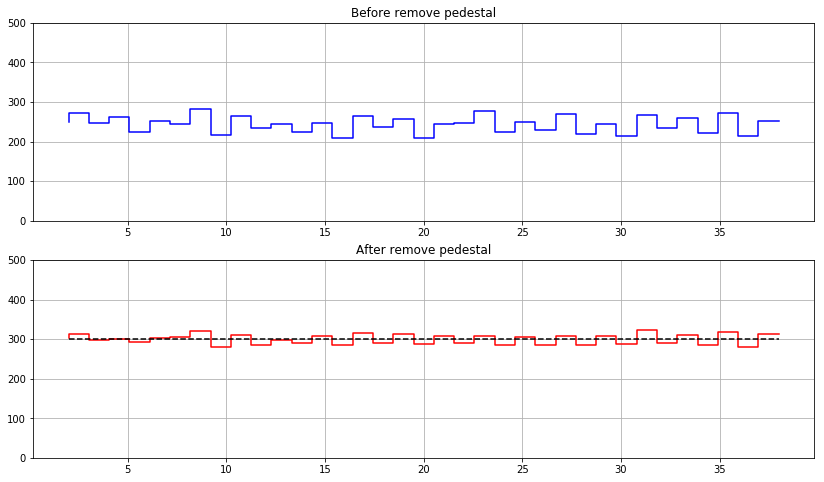

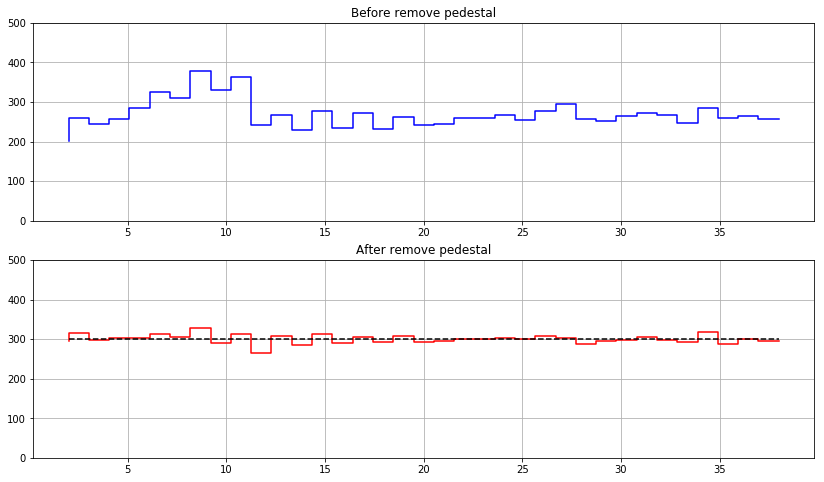

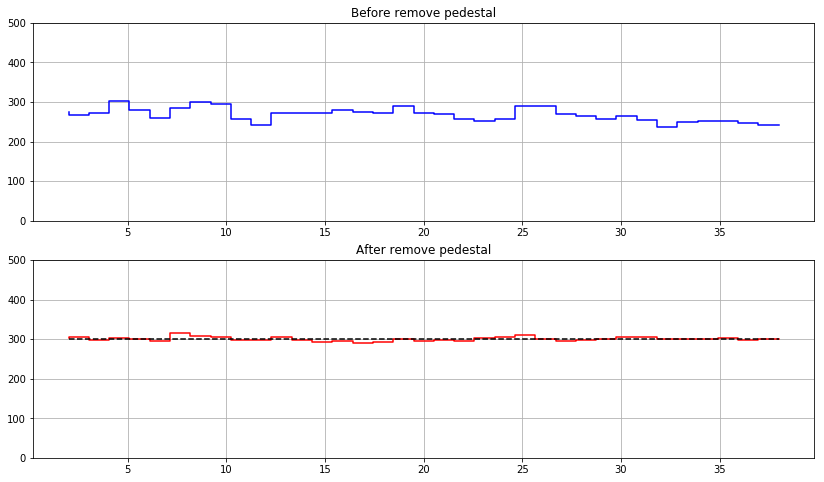

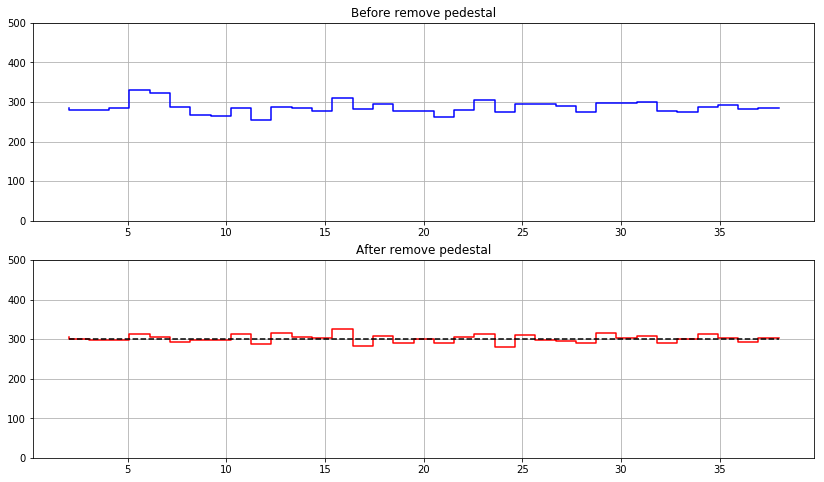

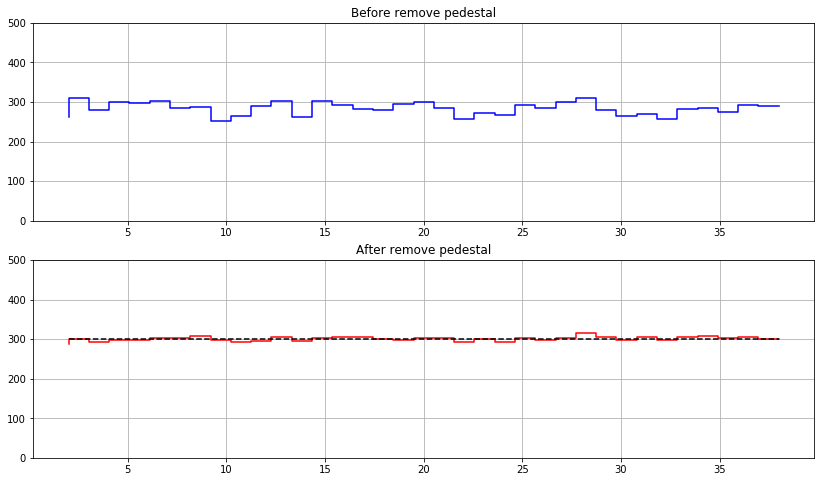

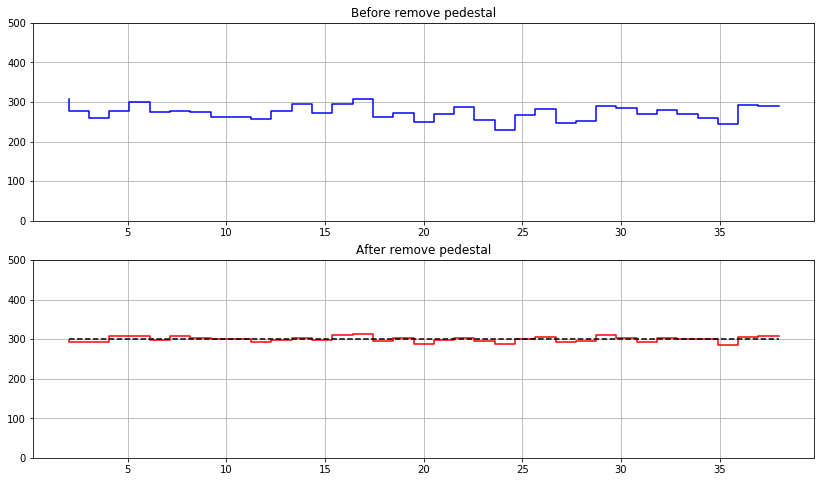

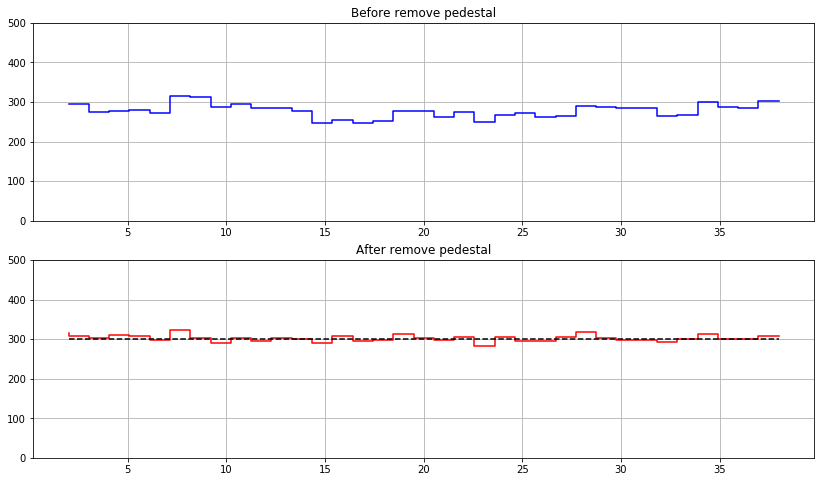

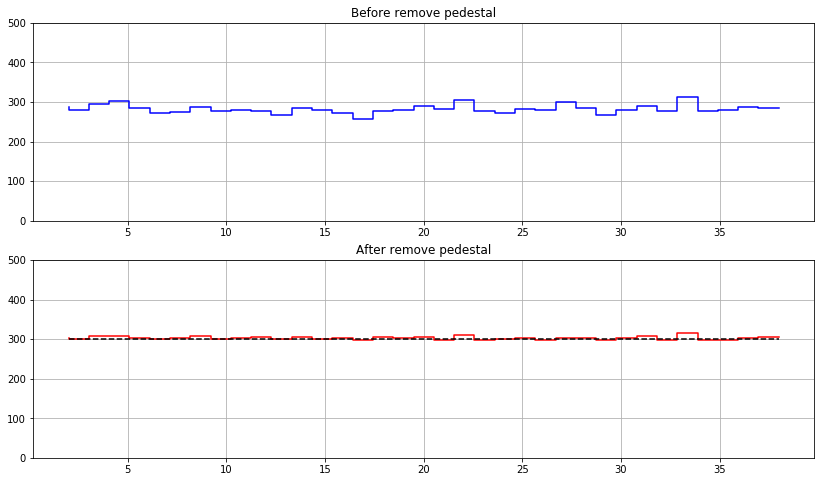

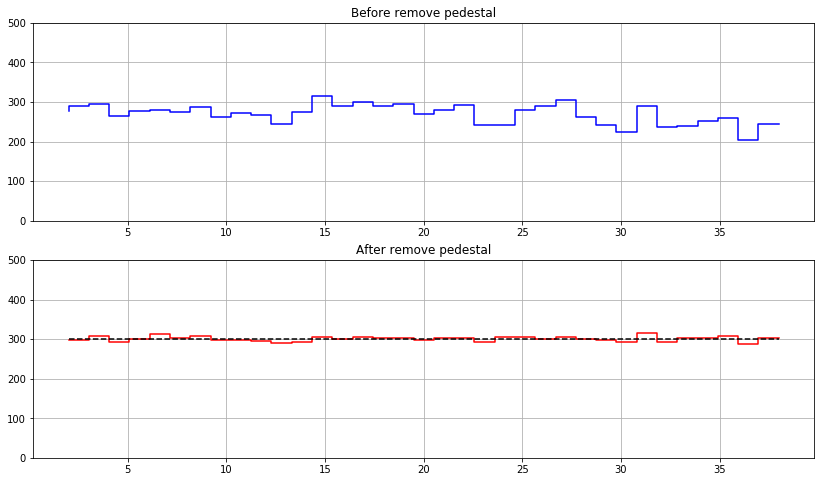

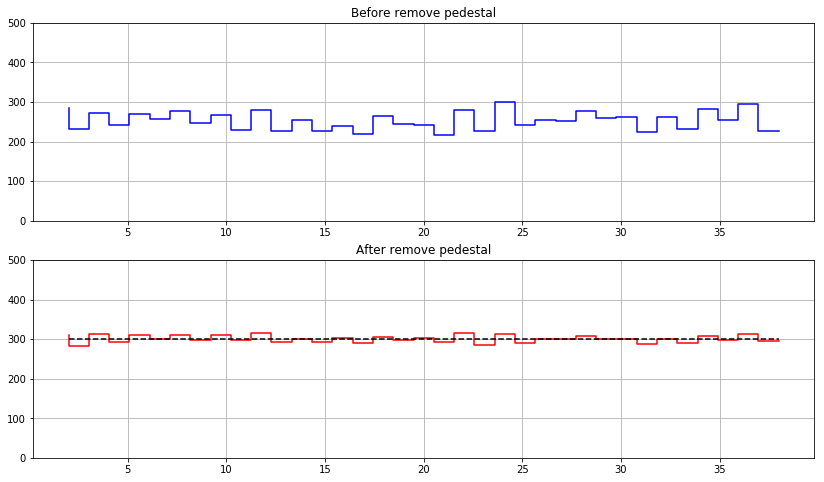

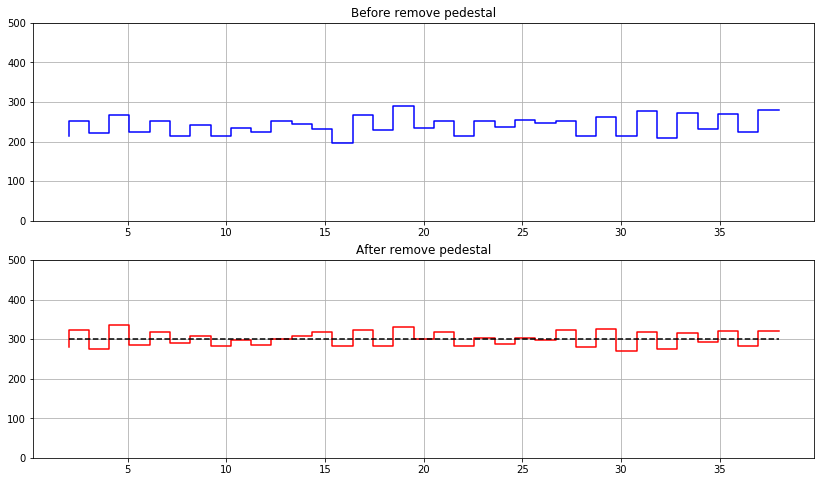

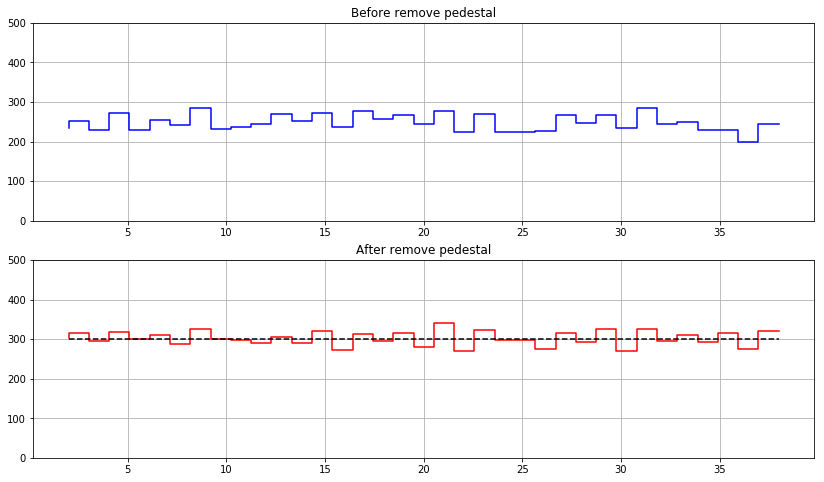

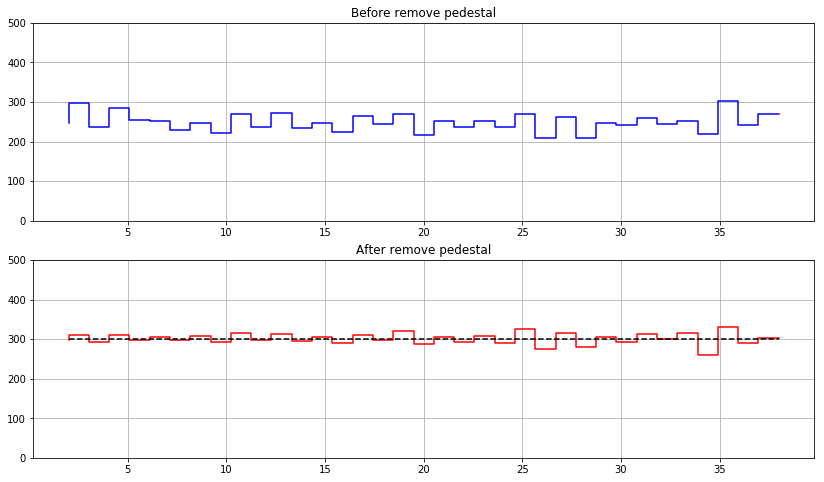

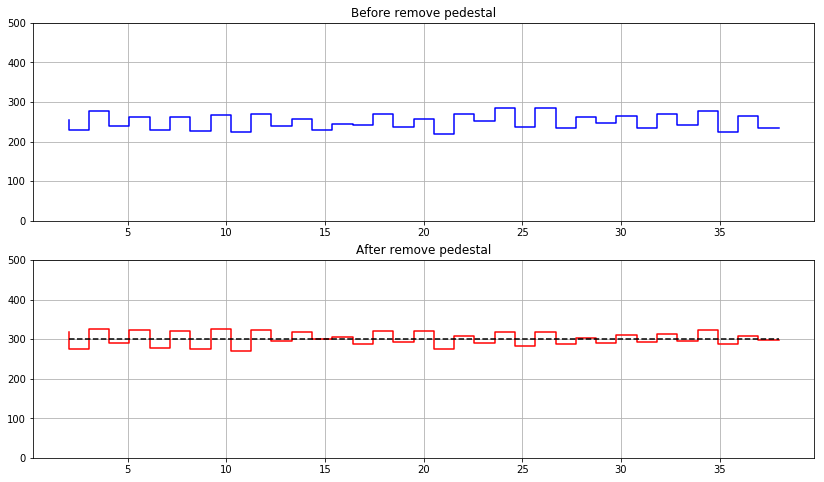

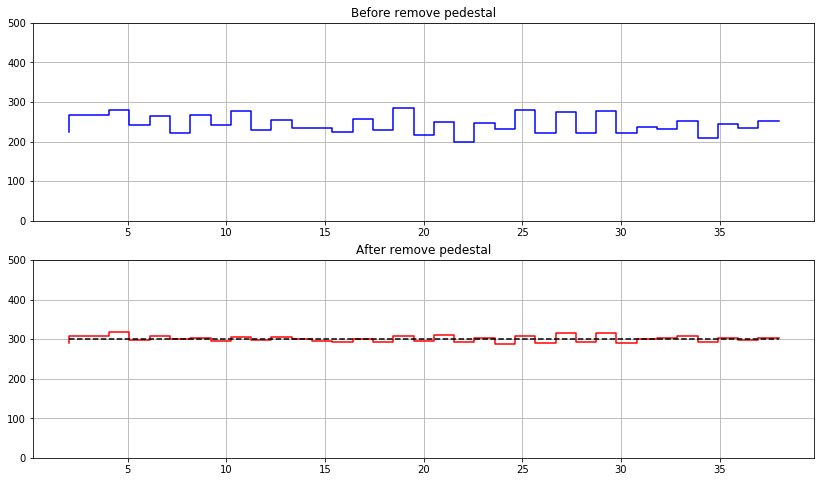

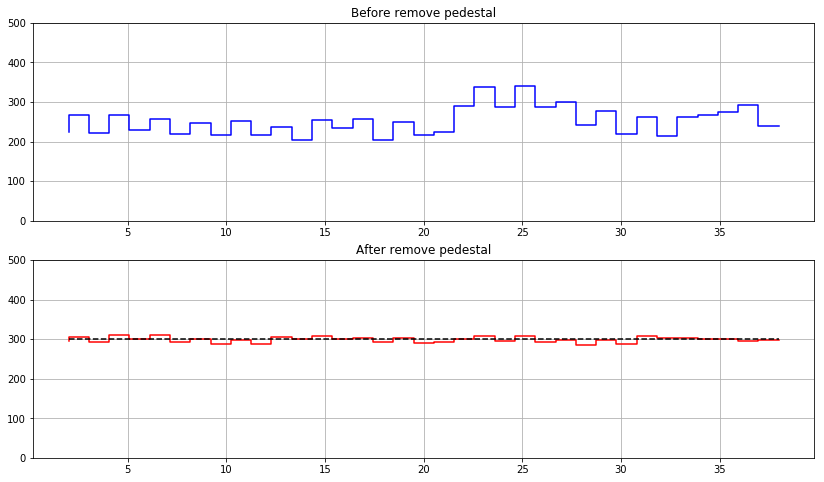

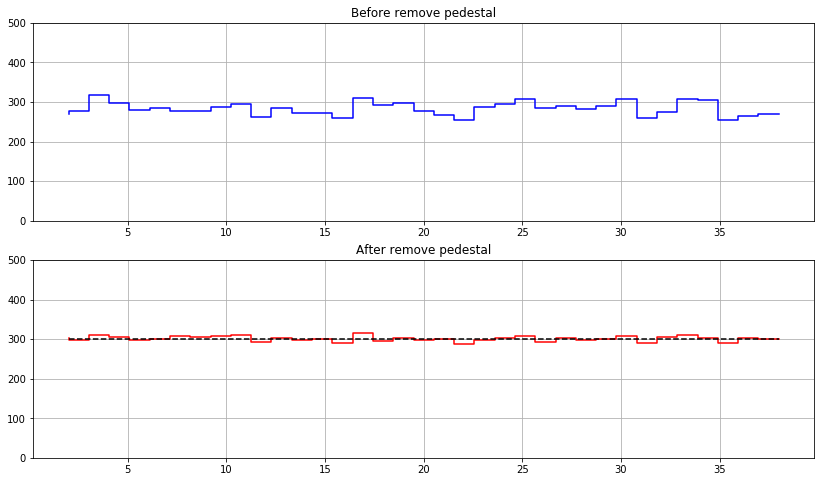

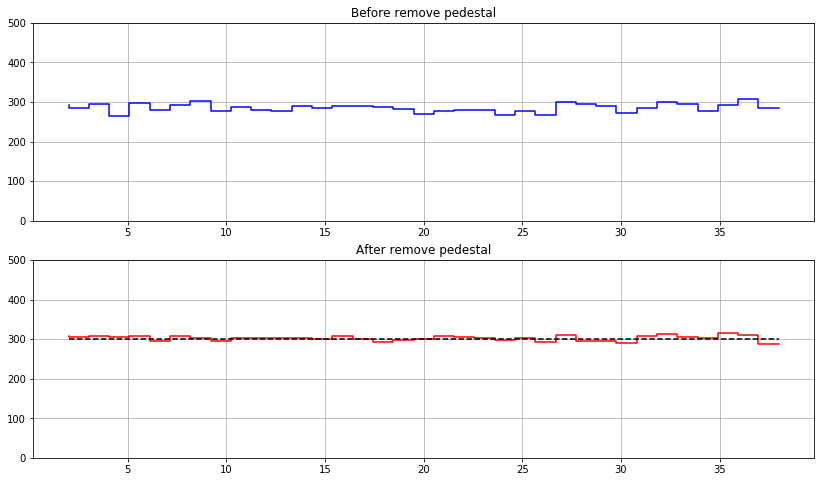

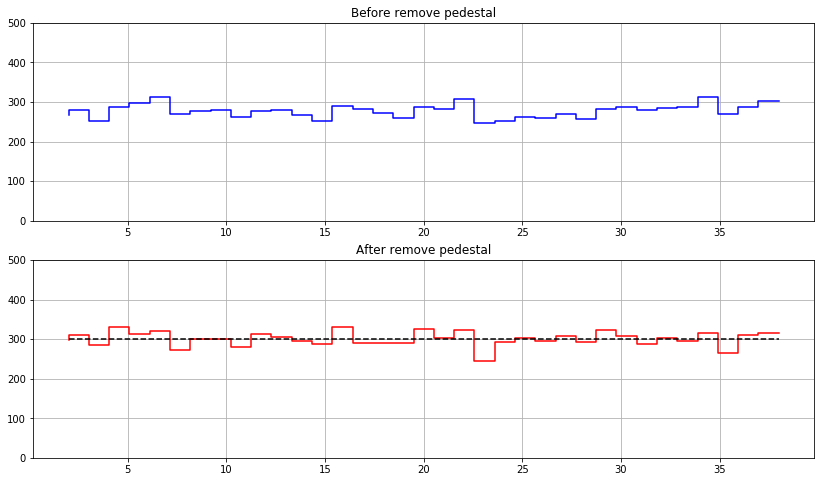

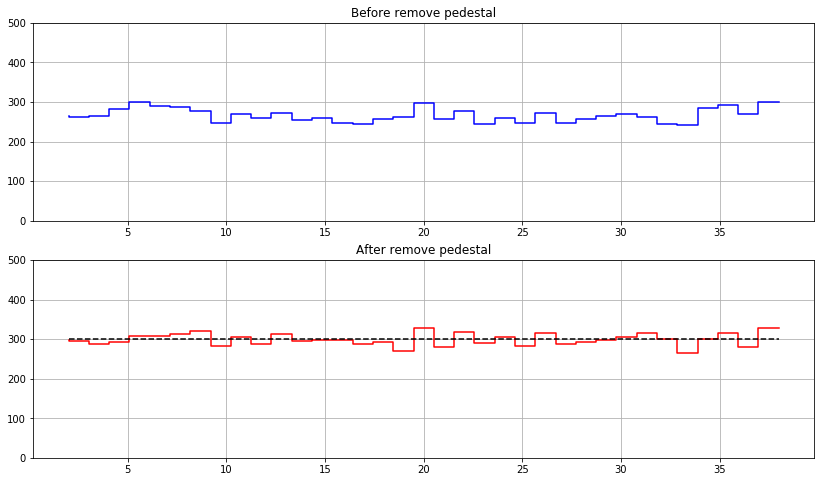

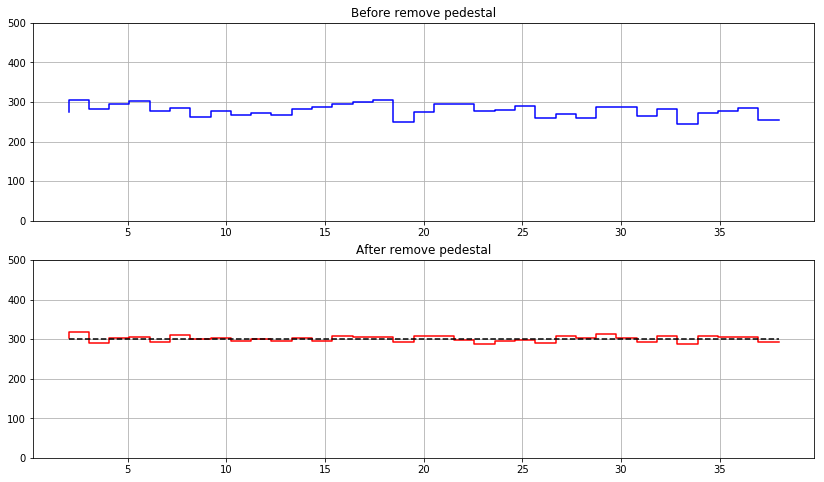

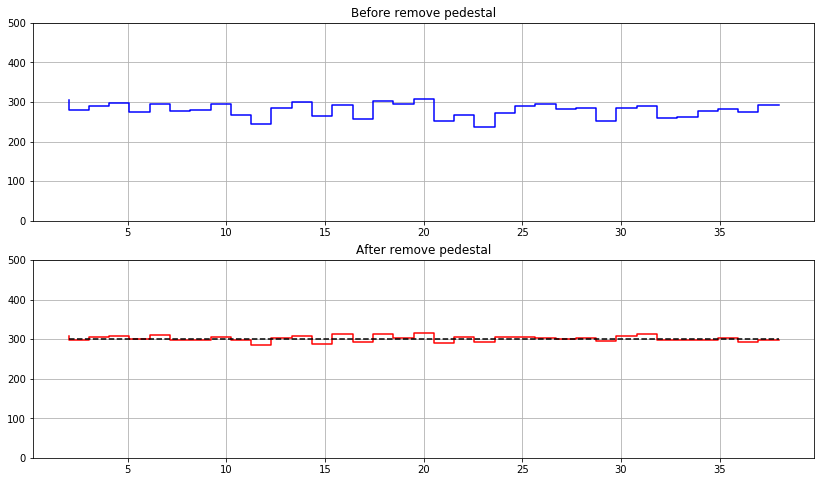

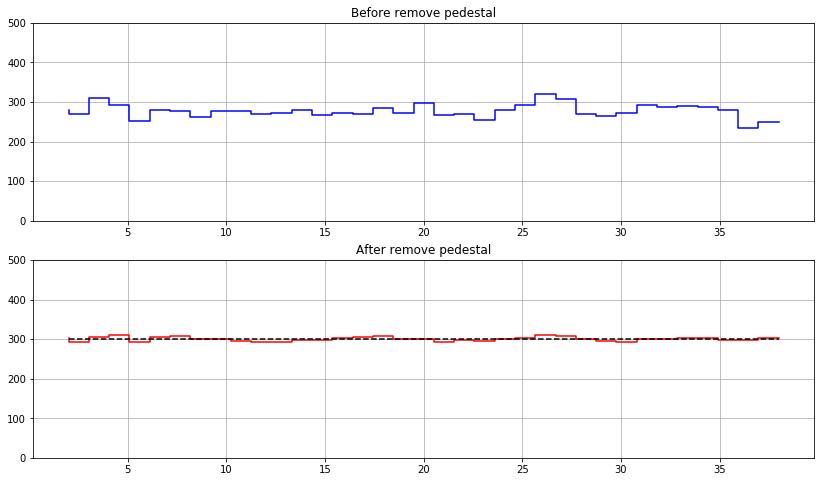

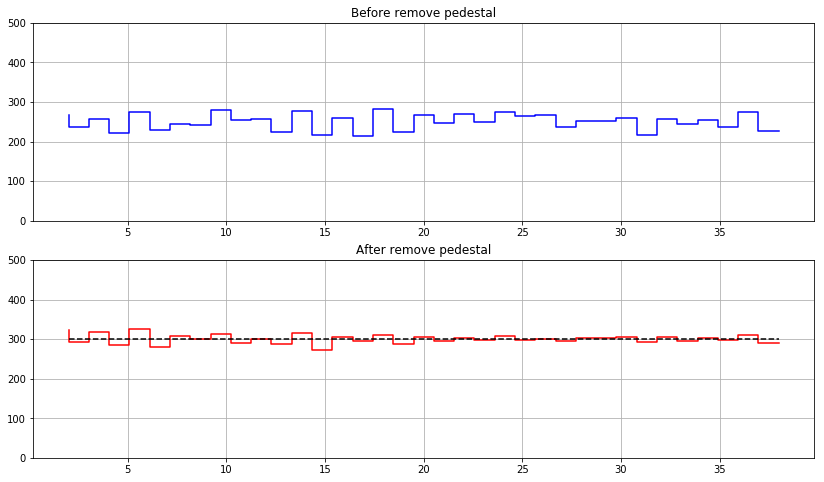

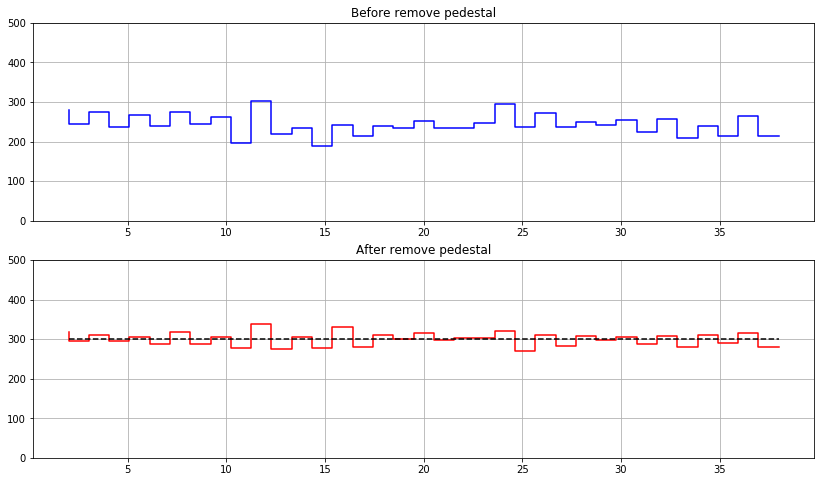

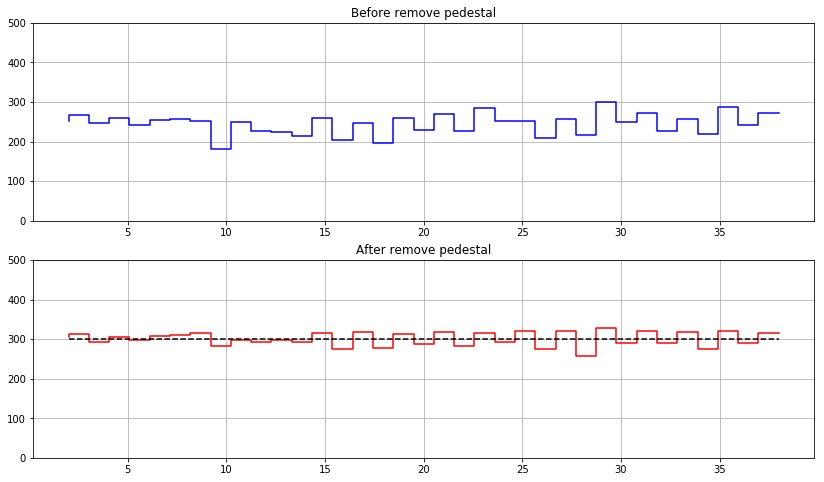

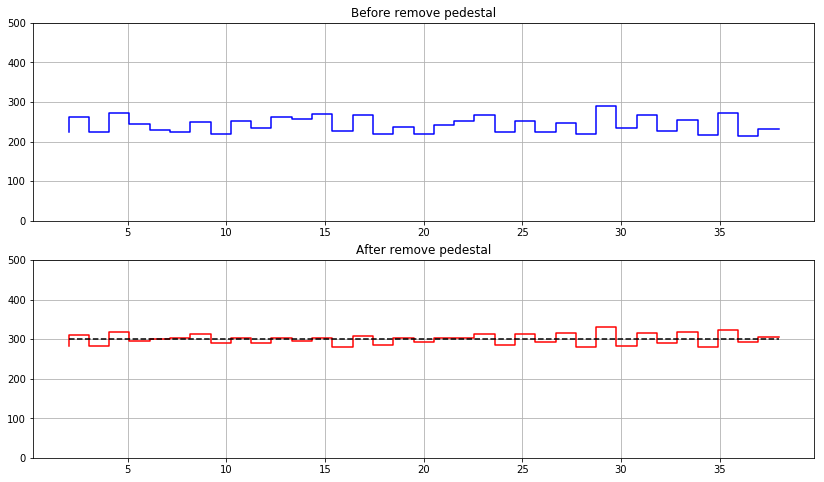

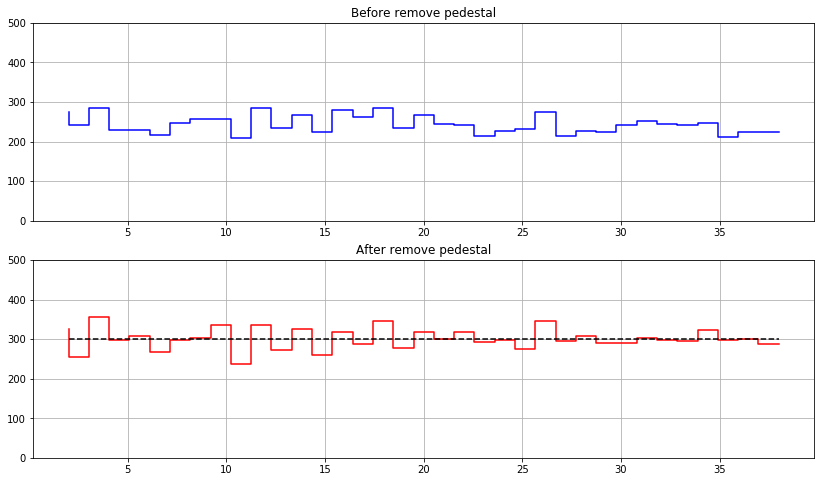

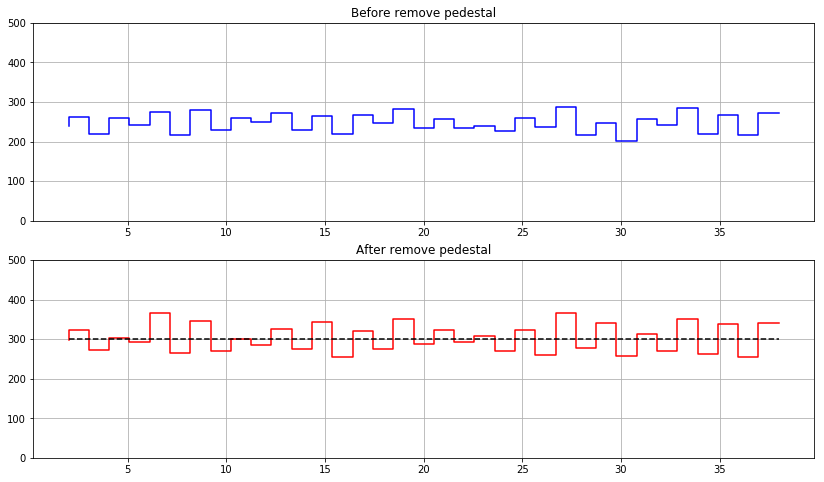

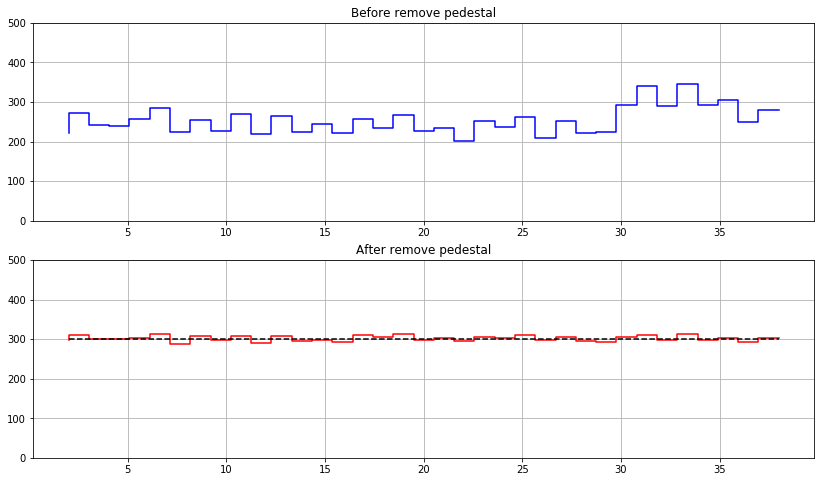

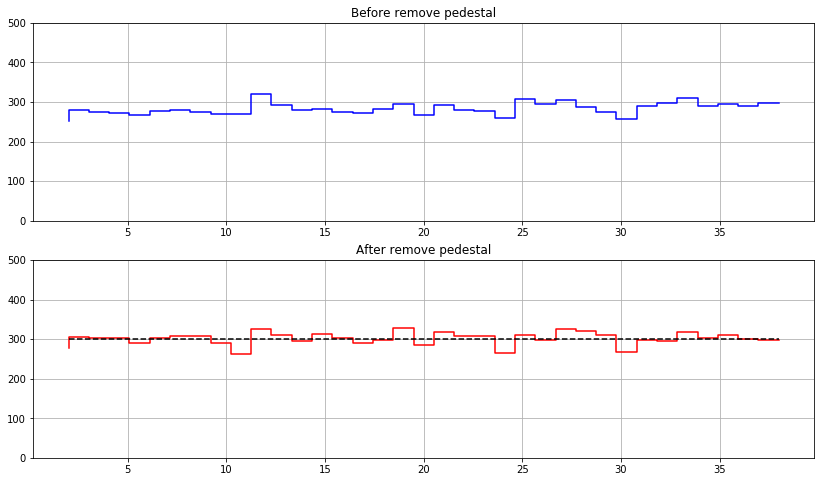

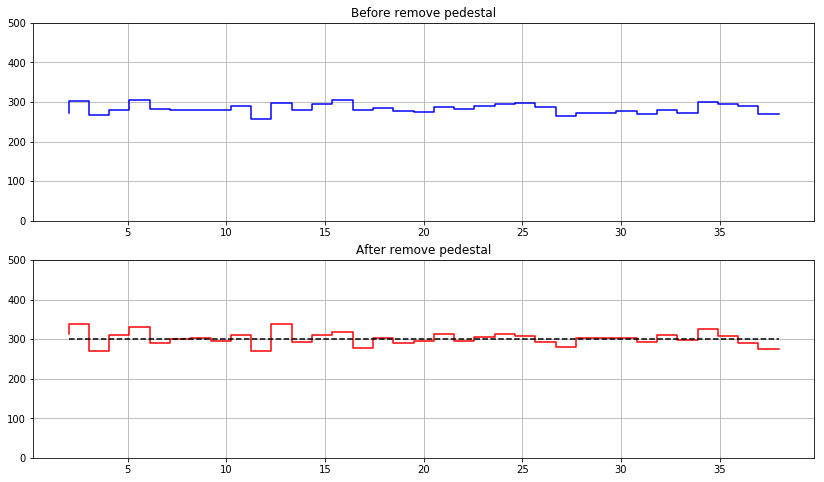

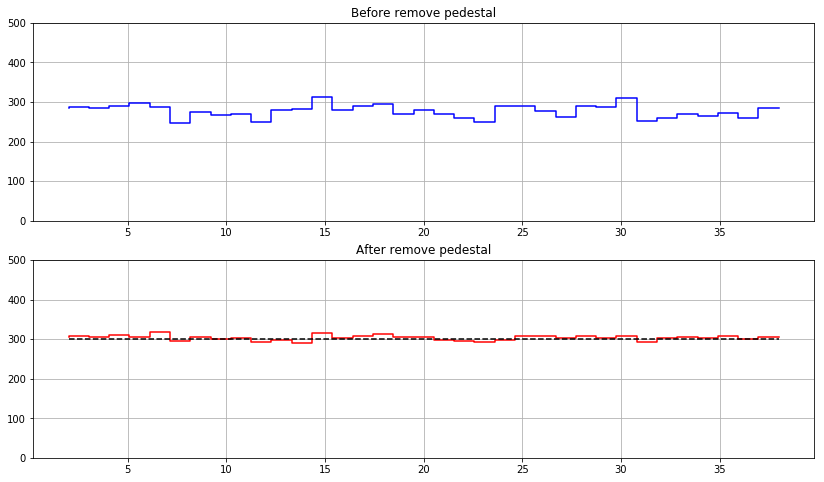

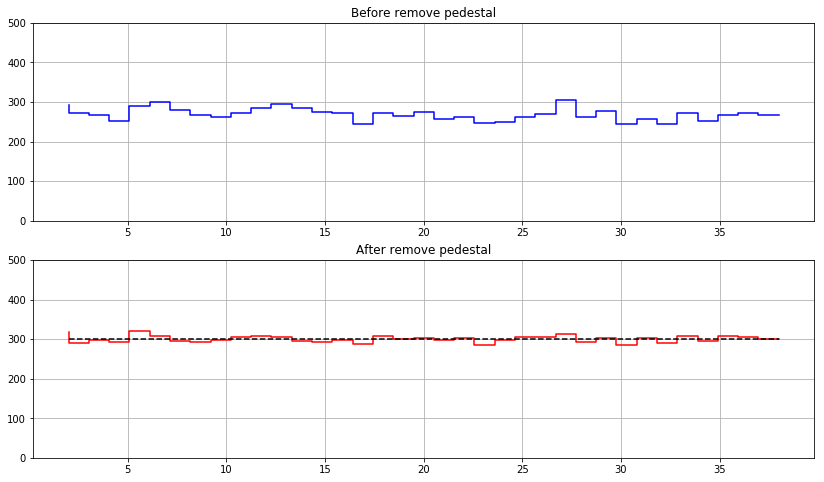

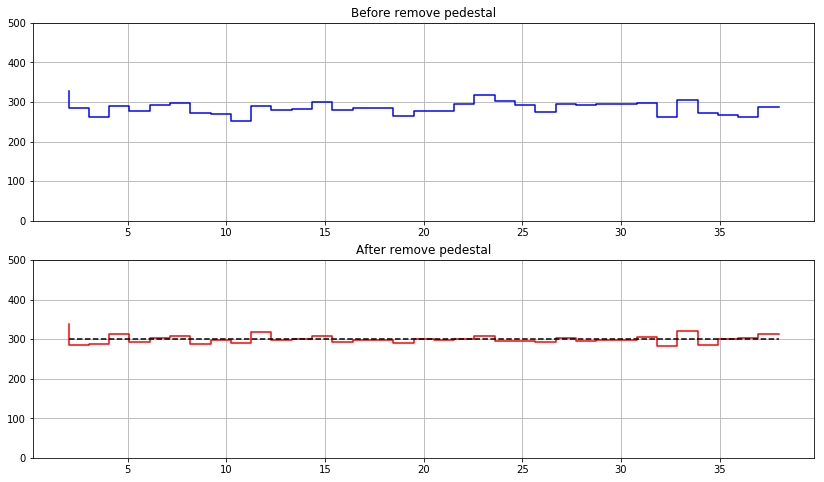

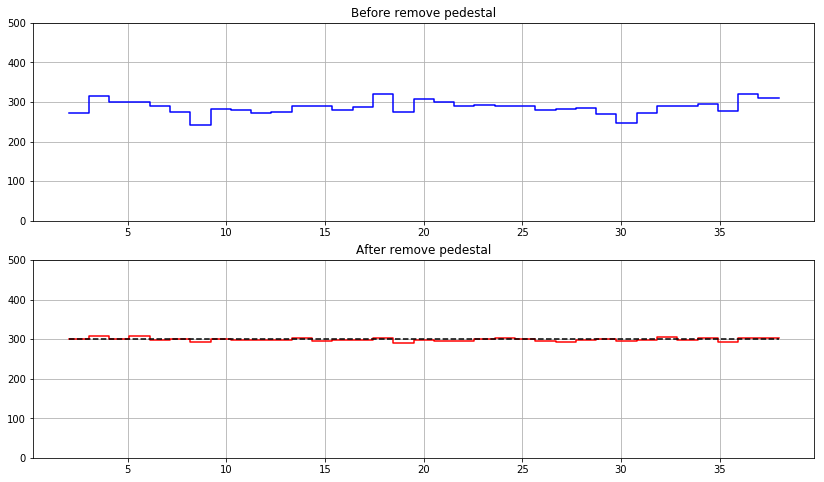

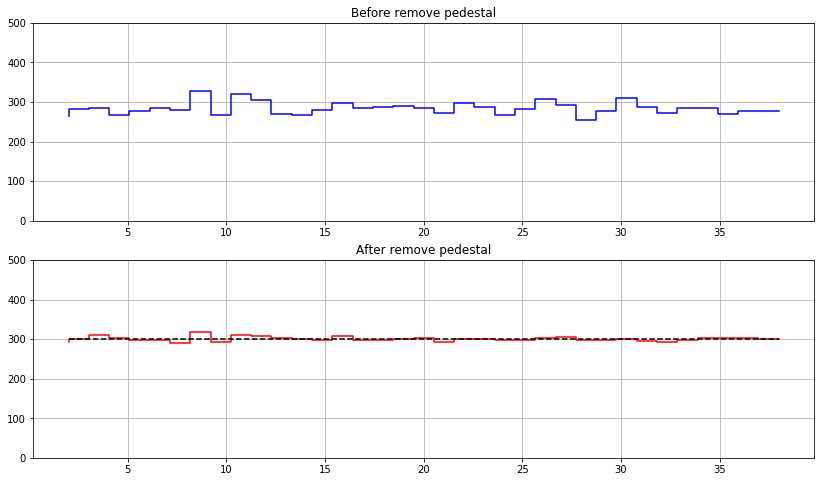

In [32]:
plt.rcParams['figure.figsize'] = (14, 8)

reader = LSTEventSource(input_url=path_to_data)
seeker = EventSeeker(reader)
pixel = 0
hg = 0
lg = 1
N = 50

waveform_before_remove_pedestal = np.zeros((N, 2, 7, 40))
waveform_after_remove_pedestal = np.zeros((N, 2, 7, 40))

for i in range(5000, 5000+N):
    nr = 1
    t = np.linspace(2, 38, 36)
    ev = seeker[i]
    fig, ax = plt.subplots(2, 1)
    ax[0].step(t, ev.r0.tel[0].waveform[lg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="blue")
    ax[0].set_ylim([0, 500])
    ax[0].grid()
    ax[0].set_title("Before remove pedestal")
    waveform_before_remove_pedestal[i-5000, hg, pixel, :] = ev.r0.tel[0].waveform[lg, nr * 7:(nr + 1) * 7, :][pixel]
    remove_pedestal(ev, ped, nr)
    waveform_after_remove_pedestal[i-5000, hg, pixel, :] = ev.r0.tel[0].waveform[lg, nr * 7:(nr + 1) * 7, :][pixel]
    ax[1].step(t, ev.r0.tel[0].waveform[lg, nr * 7:(nr + 1) * 7, 2:38][pixel], color="red")
    ax[1].plot([2, 38], [300, 300], 'k--')
    ax[1].set_ylim([0, 500])
    ax[1].grid()
    ax[1].set_title("After remove pedestal")
    plt.show()

25.590220299950527
14.271513703705775


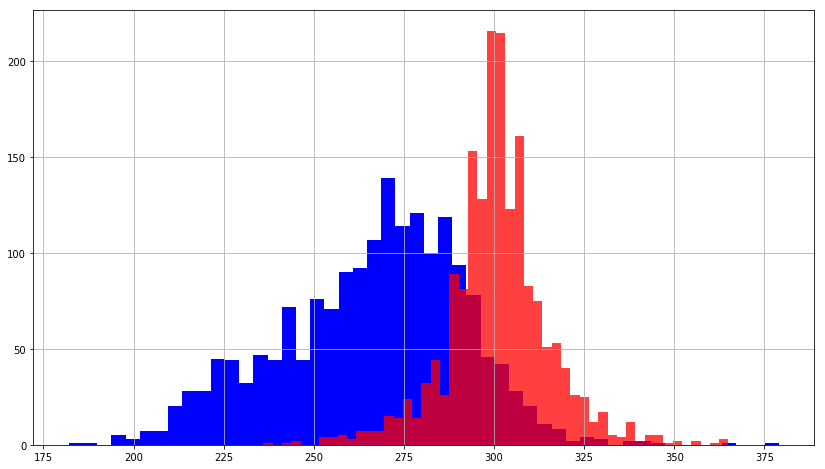

In [33]:
print(np.std(waveform_before_remove_pedestal[:, 0, pixel, 2:38].ravel()))
print(np.std(waveform_after_remove_pedestal[:, 0, pixel, 2:38].ravel()))
fig, ax0 = plt.subplots()
ax0.hist(waveform_before_remove_pedestal[:, 0, pixel, 2:38].ravel(), bins=50, color="blue")
ax0.hist(waveform_after_remove_pedestal[:, 0, pixel, 2:38].ravel(), bins=50, color="red", alpha=0.75)
ax0.grid()
plt.show()

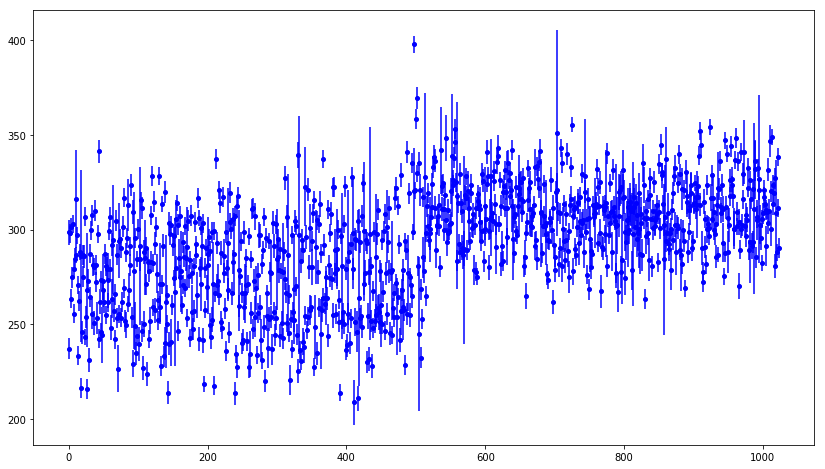

In [36]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)

fig, ax0 = plt.subplots()
cap = np.linspace(0, 1023, 1024)
ax0.errorbar(cap, ped.meanped[0, 0, 0:1024], yerr=ped.rms[0, 0, 0:1024], fmt="o", color="blue", markersize=4)
plt.show()

In [10]:
ped.rms.shape

(2, 7, 4096)